# CA2 - Supervised machine learning classification pipeline - applied to medical data

### Important information

- Do __not__ use scikit-learn (`sklearn`) or any other high-level machine learning library for this CA
- Explain your code and reasoning in markdown cells or code comments
- Label all graphs and charts if applicable
- If you use code from the internet, make sure to reference it and explain it in your own words
- If you use additional function arguments, make sure to explain them in your own words
- Use the classes `Perceptron`, `Adaline` and `Logistic Regression` from the library `mlxtend` as classifiers (`from mlxtend.classifier import Perceptron, Adaline, LogisticRegression`). _Always_ use the argument `minibatches=1` when instantiating an `Adaline` or `LogisticRegression` object. This makes the model use the gradient descent algorithm for training. Always use the `random_seed=42` argument when instantiating the classifiers. This will make your results reproducible.
- You can use any plotting library you want (e.g. `matplotlib`, `seaborn`, `plotly`, etc.)
- Use explanatory variable names (e.g. `X_train` and `X_train_scaled` for the training data before and after scaling, respectively)
- The dataset is provided in the file `fetal_health.csv` in the `assets` folder

### Additional clues

- Use the `pandas` library for initial data inspection and preprocessing
- Before training the classifiers, convert the data to raw `numpy` arrays
- For Part IV, you are aiming to create a plot that looks similar to this:
<img src="./assets/example_output.png" width="300">

### Additional information

- Feel free to create additional code or markdown cells if you think it will help you explain your reasoning or structure your code (you don't have to).

### Additional information from myself

- I am really interested and invested in this subject, and I am eager to learn as much as I can. I do 4 parallel subjects this semester, so the days aren't always long enough to do everything I want / should. I have worked with this assignment for a whole week, although I have an average of 2.5 assignments to finish every week.
- As part of this, I have used ChatGPT. Yes, as a quick source for information about python libraries, suggestions on how to build a code section and for effective error search. No, I have never copy-pasted a single code block from ChatGPT and I never will in my entire life. I demand of myself to understand my own code completely.
- If there are any faults or flaws below, I apologize for that. I have really tried, had a lot of fun and encountered a lot of weird issues on the way. But today I really had to deliver the assignment, to start on my other 2 pending ones - so that I may even have time to read before my lectures in my spare time! If I haven't explained my choices thoroughly enough, I simply haven't thought it necessary to explain more thorough. Just ask if there are any doubts!


## Part I: Data loading and data exploration

### Import necessary libraries/modules:

In [11]:
# Insert your code below
# ======================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.classifier import Perceptron, Adaline, LogisticRegression
import seaborn as sns

### Loading and exploring data

1. Load the dataset `fetal_health.csv` with `pandas`. Use the first column as the row index.
2. Check for missing data, report on your finding and remove samples with missing data, if you find any.
3. Display the raw data with appropriate plots/outputs and inspect it. Describe the distributions of the values of feature `"baseline value"`, `"accelerations"`, and the target variable `"fetal_health"`.
4. Will it be beneficial to scale the data? Why or why not?
5. Is the data linearly separable using a combination of any two pairs of features? Can we expect an accuracy close to 100% from a linear classifier?

In [12]:
# Insert your code below
# ======================
data = pd.read_csv('fetal_health.csv', header=0)
df = pd.DataFrame(data)
print(len(df))
set(df.isnull().values.any(axis=1))
# No missing data to remove in the set

1290


{False}

In [13]:
df = df.rename(columns={'Unnamed: 0': ''})
df = df.set_index('')
df.head(5)

baseline value  accelerations  prolongued_decelerations  \
                                                                
1584           132.0          0.000                       0.0   
942            136.0          0.003                       0.0   
1376           121.0          0.006                       0.0   
169            116.0          0.001                       0.0   
1293           115.0          0.006                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
                                                                              
1584                             35.0                                   1.3   
942                              54.0                                   0.7   
1376                             24.0                                   1.7   
169                              46.0                                   0.7   
1293                             19.0                                   1.7   

      percentage_of_time_with_abnormal_long_term_variability  histogram_mean  \
                                                                               
1584                                                0.0                135.0   
942                                                15.0                141.0   
1376                                                0.0                121.0   
169                                                39.0                120.0   
1293                                                0.0                121.0   

      histogram_variance  fetal_health  
                                        
1584                 9.0             0  
942                  8.0             0  
1376                25.0             0  
169                  1.0             0  
1293                 9.0             0

X_norm values:
baseline value mean: -1.5422633024250236e-16
baseline value std: 1.0000000000000002
accelerations mean: -4.4064665783572104e-17
accelerations std: 0.9999999999999999


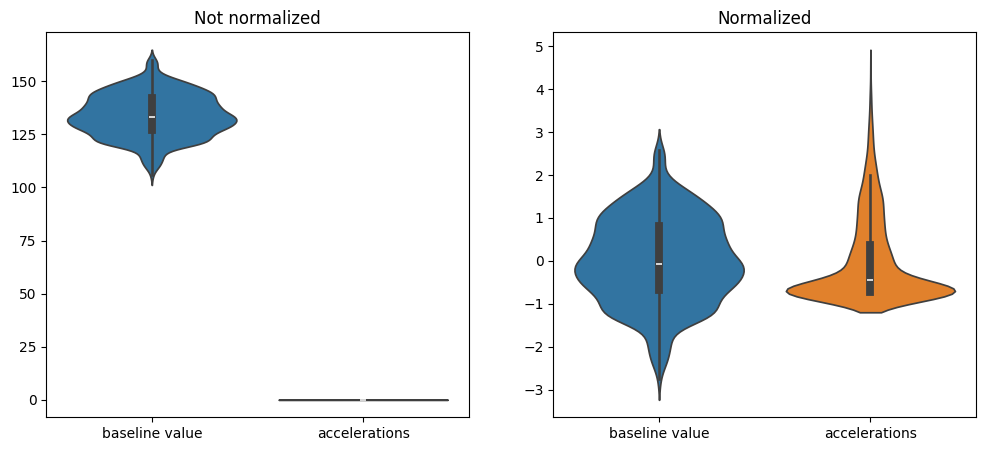

In [14]:
# To see if it would be benefitial to scale the data, I pick the two features accelerations and baseline value to show in a 
# violin plot. As we see in the bottom, the value range of these features are scaled very differently and thus scaling would
# be appropriate.

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

columns = ['baseline value', 'accelerations']
X = df.loc[:, columns]


X_mean = X.mean()
X_std = X.std()
X_norm = (X - X.mean()) / X.std()

df_X = pd.DataFrame(X)
df_X_norm = pd.DataFrame(X_norm)

sns.violinplot(data=df_X.loc[:, columns], ax=ax[0])
ax[0].set_title('Not normalized')
sns.violinplot(data=df_X_norm.loc[:, columns], ax=ax[1])
ax[1].set_title('Normalized')

print("X_norm values:")
for column in columns:
    print(f"{column} mean: {X_norm[column].mean()}\n{column} std: {X_norm[column].std()}")

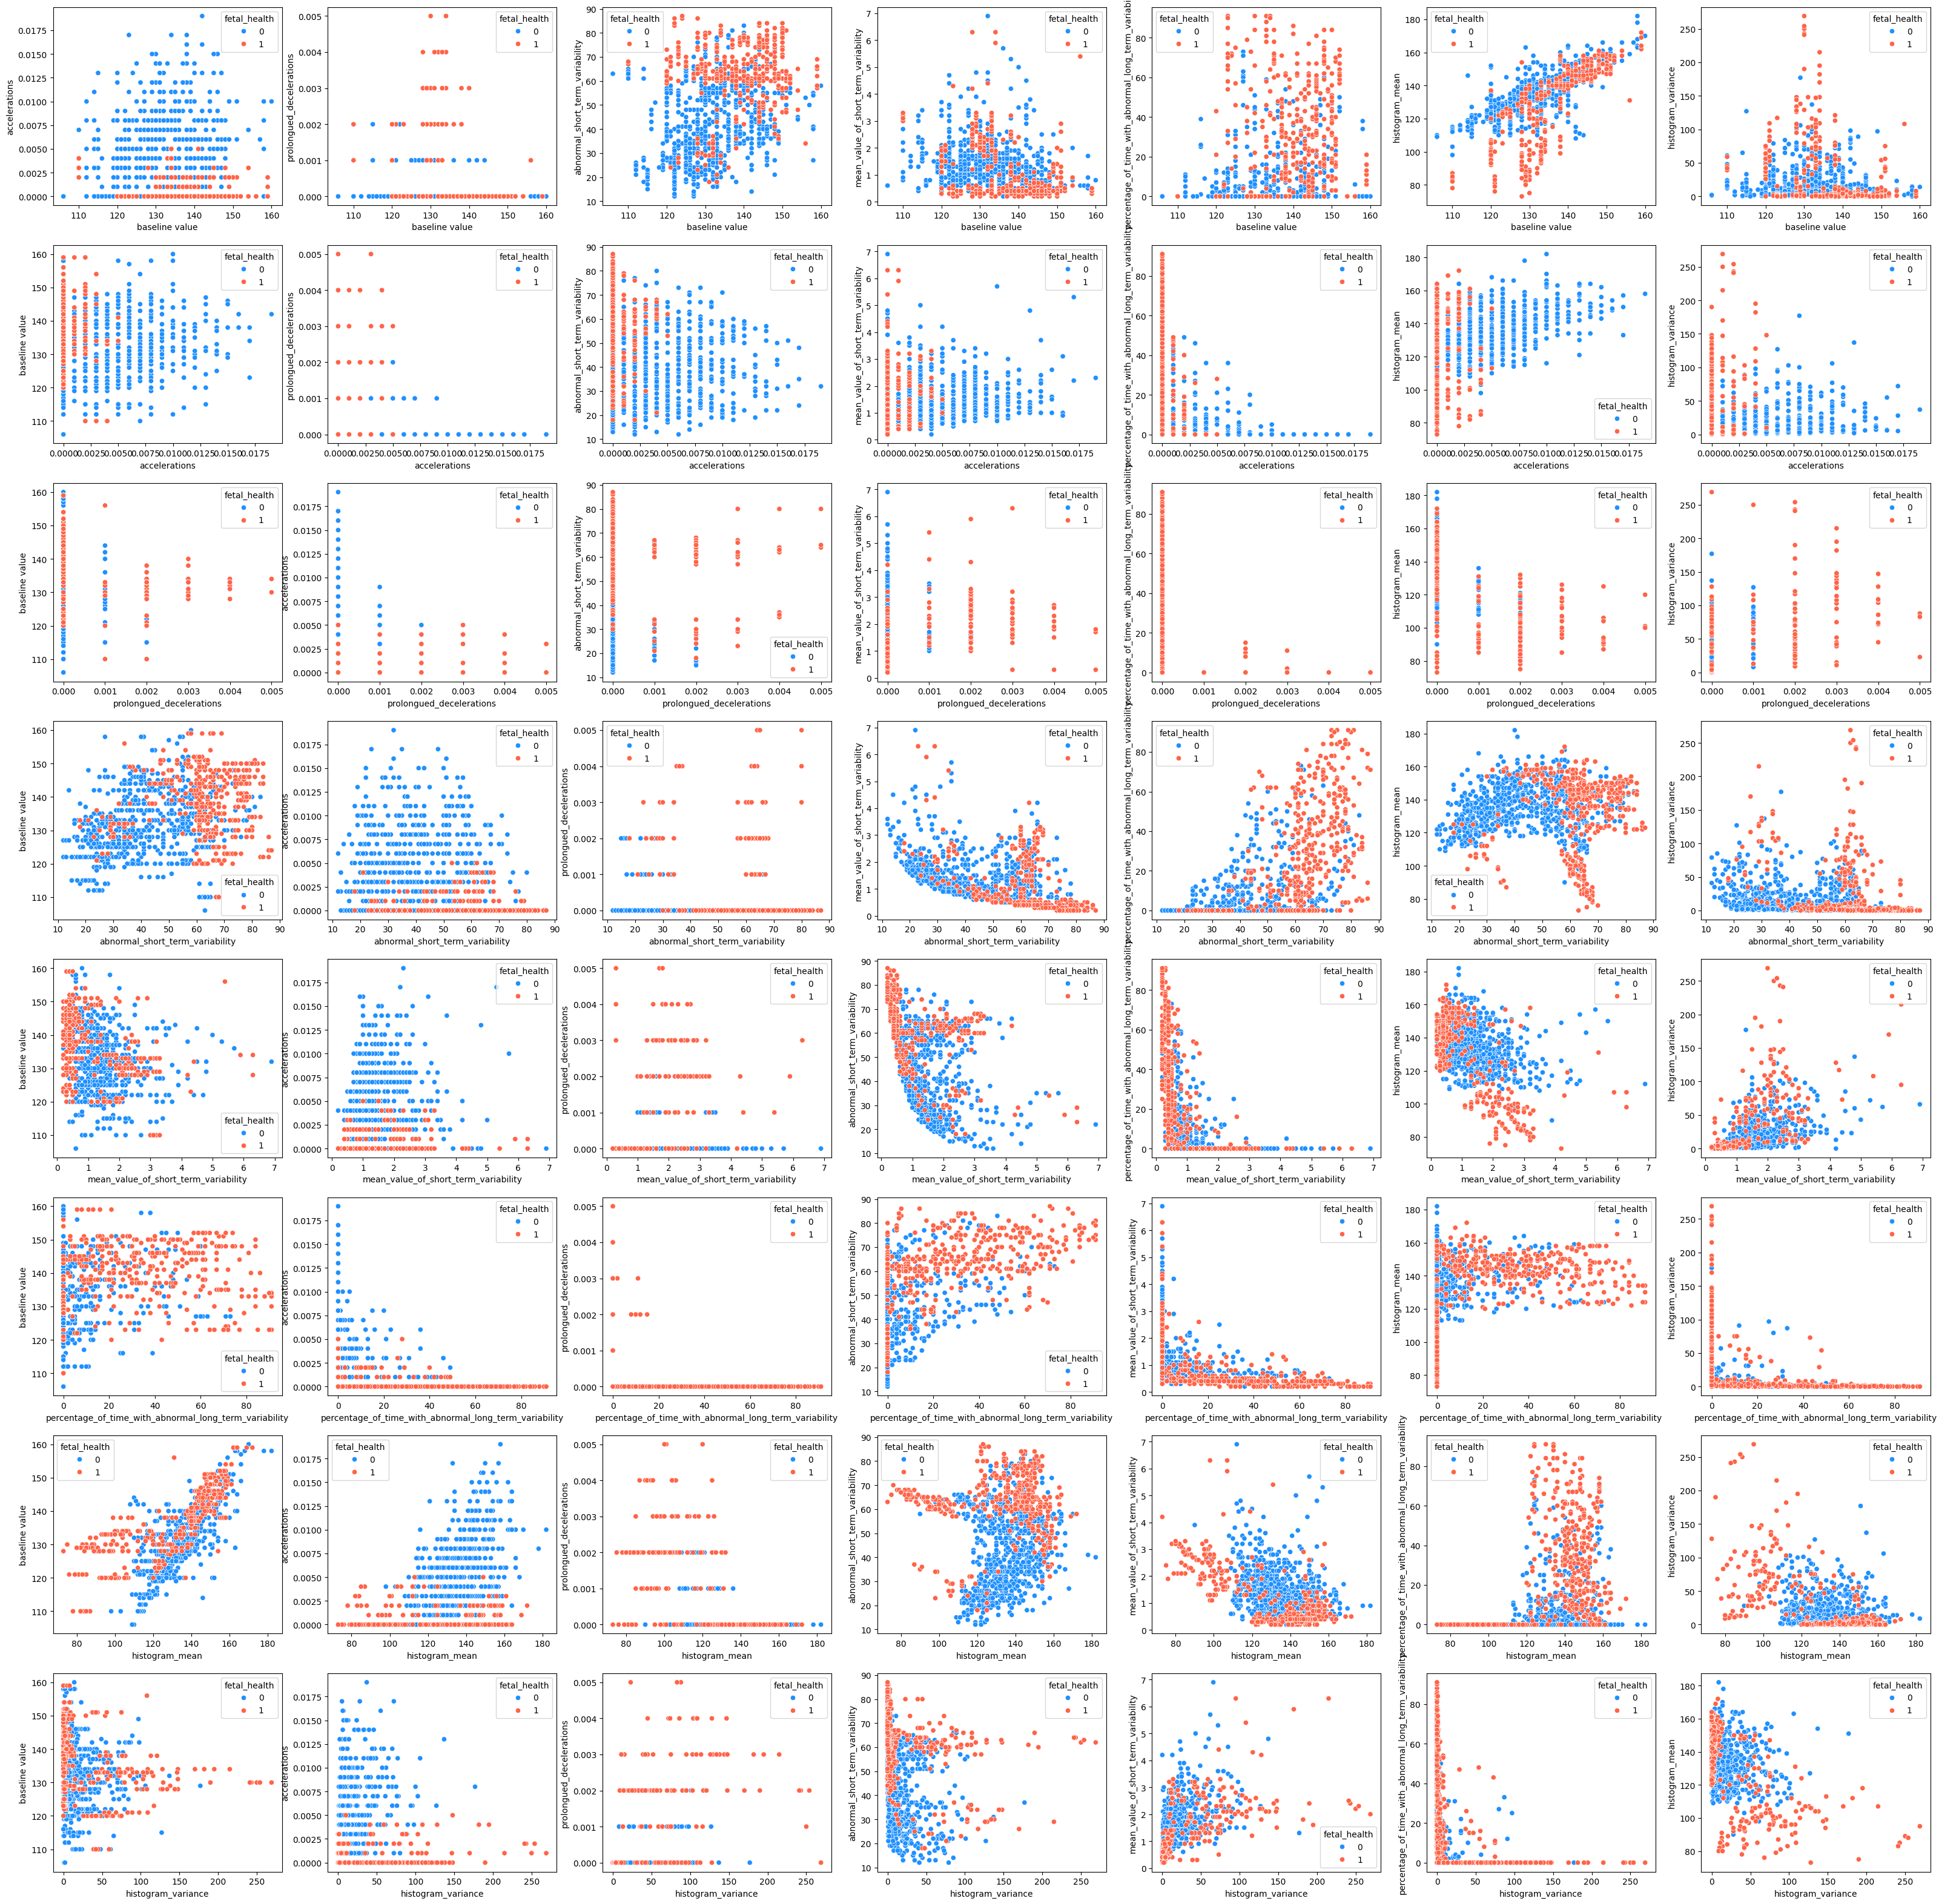

In [15]:
fig, ax = plt.subplots(8, 7, figsize=(40, 40))
features = list(df)
features.remove('fetal_health')

for row, i in enumerate(features):
    offset = 0
    for column, j in enumerate(features):
        if i != j:
            
            sns.scatterplot(x=i, y=j, hue='fetal_health', data=df, palette={0: 'dodgerblue', 1: 'tomato'}, ax=ax[row][column - offset])
        elif i == j:
            offset = 1


### Comments on the visualisation
Some pairs of features give clusters that are partially linearly separable (e.g. 'accelerations' / 'base line value' and 'accelerations' with all sorts of variability features), but either the features are not reasonable to compare (e.g. 'accelerations' and 'histogram_mean') or a linear classification model would be underfitting, because a linear decision boundary would be inaccurate. So no, none of the plots can be said to be explicitly linearly separable.

## Part II: Train/Test Split

Divide your dataset into training and testing subsets. Follow these steps to create the split:

1. **Divide the dataset into two data sets, each data set only contains samples of either class 0 or class 1:**
- Create a DataFrame `df_0` containing all data with `"fetal_health"` equal to 0.
- Create a DataFrame `df_1` containing all data with `"fetal_health"` equal to 1.

2. **Split into training and test set by randomly sampling entries from the data frames:**
- Create a DataFrame `df_0_train` containing by sampling `75%` of the entries from `df_0` (use the `sample` method of the data frame, fix the `random_state` to `42`).
- Create a DataFrame `df_1_train` using the same approach with `df_1`.
- Create a DataFrame `df_0_test` containing the remaining entries of `df_0` (use `df_0.drop(df_0_train.index)` to drop all entries except the previously extracted ones).
- Create a DataFrame `df_1_test` using the same approach with `df_1`.

3. **Merge the datasets split by classes back together:**
- Create a DataFrame `df_train` containing all entries from `df_0_train` and `df_1_train`. (Hint: use the `concat` method you know from CA1)
- Create a DataFrame `df_test` containing all entries from the two test sets.

4. **Create the following data frames from these splits:**
- `X_train`: Contains all columns of `df_train` except for the target feature `"fetal_health"`
- `X_test`: Contains all columns of `df_test` except for the target feature `"fetal_health"`
- `y_train`: Contains only the target feature `"fetal_health"` for all samples in the training set
- `y_test`: Contains only the target feature `"fetal_health"` for all samples in the test set

5. **Check that your sets have the expected sizes/shape by printing number of rows and colums ("shape") of the data sets.**
- (Sanity check: there should be 8 features, almost 1000 samples in the training set and slightly more than 300 samples in the test set.)


6. **Explain the purpose of this slightly complicated procedure. Why did we first split into the two classes? Why did we then split into a training and a testing set?**


7. **What is the share (in percent) of samples with class 0 label in test and training set, and in the intial data set?**



In [16]:
# Insert your code below
# ======================

df_0 = df[df['fetal_health'] == 0]
df_1 = df[df['fetal_health'] == 1]

df_0_train = df_0.sample(frac=0.75, random_state=42)
df_1_train = df_1.sample(frac=0.75, random_state=42)

df_0_test = df_0.drop(df_0_train.index)
df_1_test = df_1.drop(df_1_train.index)

df_train = pd.concat([df_0_train, df_1_train])
df_test = pd.concat([df_0_test, df_1_test])

y_train = pd.DataFrame(df_train['fetal_health'])
y_test = pd.DataFrame(df_test['fetal_health'])

X_train = df_train.drop('fetal_health', axis=1)
X_test = df_test.drop('fetal_health', axis=1)

print(y_train.head(5), y_train.tail(5))
print(y_test.head(5), y_test.tail(5))
print('\nDimensions, train set:\n', X_train.shape)
print('\nDimensions, test set:\n', X_test.shape)

print(f"\nPercentage of fetal_health == 1 in total dataset: {df['fetal_health'].sum() / len(df)}")
print(f"Percentage of fetal_health == 1 in train set: {y_train['fetal_health'].sum() / len(X_train)}")
print(f"Percentage of fetal_health == 1 in test set: {y_test['fetal_health'].sum() / len(X_test)}")

      fetal_health
                  
562              0
145              0
1534             0
1638             0
911              0       fetal_health
                  
475              1
1905             1
92               1
2032             1
632              1
      fetal_health
                  
942              0
1293             0
2084             0
246              0
284              0       fetal_health
                  
2030             1
2035             1
2038             1
2121             1
2124             1

Dimensions, train set:
 (967, 8)

Dimensions, test set:
 (323, 8)

Percentage of fetal_health == 1 in total dataset: 0.362015503875969
Percentage of fetal_health == 1 in train set: 0.3619441571871768
Percentage of fetal_health == 1 in test set: 0.3622291021671827


### 6 and 7

Overall, this "slightly complicated procedure" provides us with a training set of 75% the size of the initial dataset, and leaves the remaining 25% as a training set for our classification model.

Mainly, we need a training set notably larger than the evaluation set, which is why we take out 75% of the total dataset for training. Now I'm not really sure why these sets must have the exact same share of 0s and 1s for the target value `fetal_health`, but that's in any case the first of the things the above procedure makes sure of. My guess would be that it's more practical to have an equal share of target values for training and test set, so that the results (accuracy) can be compared more easily between training and test. Then this ratio could be made equal to the ratio of the initial dataset to better reflect the distribution of the initial data.

In [17]:
X_train.sort_values(by='', ascending=True)

baseline value  accelerations  prolongued_decelerations  \
                                                                
0              120.0          0.000                     0.000   
6              134.0          0.001                     0.003   
7              122.0          0.000                     0.000   
8              122.0          0.000                     0.000   
9              122.0          0.000                     0.000   
...              ...            ...                       ...   
2116           140.0          0.004                     0.000   
2117           140.0          0.000                     0.000   
2118           140.0          0.000                     0.000   
2122           140.0          0.001                     0.000   
2123           140.0          0.001                     0.000   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
                                                                              
0                                73.0                                   0.5   
6                                29.0                                   6.3   
7                                83.0                                   0.5   
8                                84.0                                   0.5   
9                                86.0                                   0.3   
...                               ...                                   ...   
2116                             80.0                                   0.2   
2117                             79.0                                   0.3   
2118                             79.0                                   0.5   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  histogram_mean  \
                                                                               
0                                                  43.0                137.0   
6                                                   0.0                107.0   
7                                                   6.0                122.0   
8                                                   5.0                122.0   
9                                                   6.0                122.0   
...                                                 ...                  ...   
2116                                               36.0                148.0   
2117                                               20.0                143.0   
2118                                               26.0                142.0   
2122                                               22.0                148.0   
2123                                               20.0                148.0   

      histogram_variance  
                          
0                   73.0  
6                  215.0  
7                    3.0  
8                    3.0  
9                    1.0  
...                  ...  
2116                 1.0  
2117                 1.0  
2118                 2.0  
2122                 3.0  
2123                 4.0  

[967 rows x 8 columns]

## Scaling the data

I decided to scale the data at this point, while the data is still organized in dataframes. This way, it's easier to treat the data by using the pandas DataFrame-library. And since the data is already split, no data leakage will occur if mean and standard deviation are calculated and applied individually for the train set and the test set.

Train set, column baseline value; Former mean: 133.92657704239917, new mean: -1.0287071665606414e-16.
Former std: 10.229548954455662, new std: 0.9999999999999999
Test set, column baseline value; new mean: -0.022784835521537664.
New std: 0.9469755842853289
Train set, column accelerations; Former mean: 0.002562564632885212, new mean: 0.0.
Former std: 0.0035997994020069922, new std: 1.0
Test set, column accelerations; new mean: 0.10517581548903426.
New std: 1.0851908941004618
Train set, column prolongued_decelerations; Former mean: 0.00021923474663908997, new mean: 0.0.
Former std: 0.0006882045486173359, new std: 1.0
Test set, column prolongued_decelerations; new mean: 0.06832143644562638.
New std: 1.1709377093401303
Train set, column abnormal_short_term_variability; Former mean: 49.71664943123061, new mean: 2.3513306664243234e-16.
Former std: 17.91110906950046, new std: 1.0
Test set, column abnormal_short_term_variability; new mean: 0.009424289948940056.
New std: 0.969818738039351
Train 

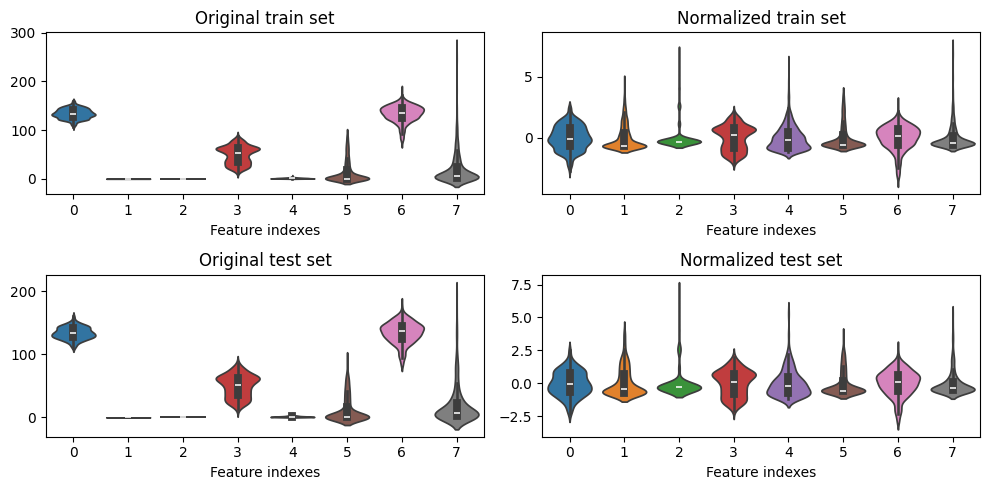

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))

# Need to convert all variations of columns into individual dataframes before plotting them in the violin plots. Or else tyou'll just get one violin per plot.

X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

for feature in features:

    index = list(X_train).index(feature)

    # Got told to only use train mean and std to scale both sets
    mean = X_train[feature].mean()
    stddev = X_train[feature].std()

    new_train_column = (X_train[feature] - mean) / stddev
    new_test_column = (X_test[feature] - mean) / stddev

    X_train_norm[feature] = new_train_column
    X_test_norm[feature] = new_test_column

    print(f"Train set, column {feature}; Former mean: {mean}, new mean: {X_train_norm[feature].mean()}.\nFormer std: {stddev}, new std: {X_train_norm[feature].std()}\nTest set, column {feature}; new mean: {X_test_norm[feature].mean()}.\nNew std: {X_test_norm[feature].std()}")
    
sns.violinplot(data=X_train, ax=ax[0][0])
ax[0][0].set_xticks(range(len(features)))
ax[0][0].set_xticklabels(range(len(features)))
ax[0][0].set_xlabel('Feature indexes')
ax[0][0].set_title('Original train set')

sns.violinplot(data=X_train_norm, ax=ax[0][1])
ax[0][1].set_xticks(range(len(features)))
ax[0][1].set_xticklabels(range(len(features)))
ax[0][1].set_xlabel('Feature indexes')
ax[0][1].set_title('Normalized train set')

sns.violinplot(data=X_test, ax=ax[1][0])
ax[1][0].set_xticks(range(len(features)))
ax[1][0].set_xticklabels(range(len(features)))
ax[1][0].set_xlabel('Feature indexes')
ax[1][0].set_title('Original test set')

sns.violinplot(data=X_test_norm, ax=ax[1][1])
ax[1][1].set_xticks(range(len(features)))
ax[1][1].set_xticklabels(range(len(features)))
ax[1][1].set_xlabel('Feature indexes')
ax[1][1].set_title('Normalized test set')

plt.tight_layout()

X_train = X_train_norm
X_test = X_test_norm

### Comments on my scaling and the violin plots

The x-labels are the indexes of the feature labels, so that the x-axis won't be smudged with overlapping text due to long feature descriptions.

To control that the data had been satisfyingly converted (normalized), I made sure to print an outline of former and new means and standard deviations for each column. Due to this overview, all convertions turned out to be successful. This is confirmed by the violin plots to the right, where all the plots are sized (scaled) equally and with the white line in the middle (the median) approximately on y=0.0.

### Convert data to numpy arrays and shuffle the training data

Many machine learning models (including those you will work with later in the assignment) will not accept DataFrames as input. Instead, they will only work if you pass numpy arrays containing the data.
Here, we convert the DataFrames `X_train`, `X_test`, `y_train`, and `y_test` to numpy arrays `X_train`, `X_test`, `y_train`, and `y_test`.

Moreover we shuffle the training data. This is important because the training data is currently ordered by class. In Part IV, we use the first n samples from the training set to train the classifiers. If we did not shuffle the data, the classifiers would only be trained on samples of class 0.

Nothing to be done here, just execute the cell.

In [19]:
# convert to numpy arrays

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# shuffle training data
np.random.seed(42) # for reproducibility
shuffle_index = np.random.permutation(len(X_train)) # generate random indices
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # shuffle data by applying reordering with the random indices

# I had to do this convertion, or else the .fit(X_train, y_train)-procedures wouldn't work (Error message: y_train must be an integer array. Found type64):
y_train = y_train.flatten().astype(int)
y_test = y_test.flatten().astype(int)

## Part III: Scaling the data

1. Standardize the training _and_ test data so that each feature has a mean of 0 and a standard deviation of 1.
2. Check that the scaling was successful
    - by printing the mean and standard deviation of each feature in the scaled training set
    - by putting the scaled training set into a DataFrame and make a violin plot of the data

__Hint:__ use the `axis` argument to calculate mean and standard deviation column-wise.

__Important:__ Avoid data leakage!

__More hints:__

1. For each column, subtract the mean $(\mu)$ of each column from each value in the column
2. Divide the result by the standard deviation $(\sigma)$ of the column

(You saw how to do both operations in the lecture. If you don't remember, you can look it up in Canvas files.)

Mathematically (in case this is useful for you), this transformation can be represented for each column as follows:

$$ X_\text{scaled} = \frac{(X - \mu)}{\sigma} $$

where:
- $(X_\text{scaled})$ are the new, transformed column values (a column-vector)
- $(X)$ is the original values
- $(\mu)$ is the mean of the column
- $(\sigma)$ is the standard deviation of the column



### My scaling to be seen above

I did this part before converting the data to numpy arrays (toward end of part II), while the sets were still organized in dataframes, as I found that more convenient, tidy and providing a better overview.

## Part IV: Training and evaluation with different dataset sizes and training times

Often, a larger dataset size will yield better model performance. (As we will learn later, this usually prevents overfitting and increases the generalization capability of the trained model.)
However, collecting data is usually rather expensive.

In this part of the exercise, you will investigate

- how the model performance changes with varying dataset size
- how the model performance changes with varying numbers of epochs/iterations of the optimizer/solver (increasing training time).

For this task (Part IV), use the `Adaline`, `Perceptron`, and `LogisticRegression` classifier from the `mlxtend` library. All use the gradient descent (GD) algorithm for training.

__Important__: Use a learning rate of `1e-4` (`0.0001`) for all classifiers, and use the argument `minibatches=1` when initializing `Adaline` and `LogisticRegression` classifier (this will make sure it uses GD). For all three classifiers, pass `random_seed=42` when initializing the classifier to ensure reproducibility of the results.

### Model training

Train the model models using progressively larger subsets of your dataset, specifically: first 50 rows, first 100 rows, first 150 rows, ..., first 650 rows, first 700 rows (in total $14$ different variants).

For each number of rows train the model with progressively larger number of epochs: 2, 7, 12, 17, ..., 87, 92, 97 (in total $20$ different model variants).

The resulting $14 \times 20 = 280$ models obtained from the different combinations of subsets and number of epochs. An output of the training process could look like this:

```
Model (1) Train a model with first 50 rows of data for 2 epochs
Model (2) Train a model with first 50 rows of data for 7 epochs
Model (3) Train a model with first 50 rows of data for 12 epochs
...
Model (21) Train a model with first 100 rows of data for 2 epochs
Model (22) Train a model with first 100 rows of data for 7 epochs
...
Model (279) Train a model with first 700 rows of data for 92 epochs
Model (280) Train a model with first 700 rows of data for 97 epochs
```

### Model evaluation

For each of the $280$ models, calculate the __accuracy on the test set__ (do __not__ use the score method but compute accuracy yourself).
Store the results in the provided 2D numpy array (it has $14$ rows and $20$ columns).
The rows of the array correspond to the different dataset sizes, and the columns correspond to the different numbers of epochs.

### Tasks
1. Train the $280$ Adaline classifiers as mentioned above and calculate the accuracy for each of the $280$ variants.
2. Generalize your code so that is doing the same procedure for all three classifiers: `Perceptron`, `Adaline`, and `LogisticRegression` after each other. Store the result for all classifiers. You can for example use an array of shape $3\times14\times20$ to store the accuracies of the three classifiers.

Note that executing the cells will take some time (but on most systems it should not be more than 5 minutes).

In [23]:
# Train and evaluate all model variants
# Insert your code below
# ======================

# I decided to make a generalised code right away. Sorry for that.

# Creating a numpy array with 0s with the shape of ((amount of rows in training set, type of classifier, number of epochs)):

results = np.zeros((3, 14, 20))

for i, n_rows in enumerate(range(50, 701, 50)):
    X = X_train[:n_rows]
    y = y_train[:n_rows]

    # Adding an underway print of status, so that one always can see how far the training process has come:
    print(f'Executing {n_rows} rows')
    
    for j, n_epochs in enumerate(range(2, 98, 5)):
        index = j
        ppn = Perceptron(eta=0.0001, epochs=n_epochs, random_seed=42)
        ad = Adaline(eta=0.0001, epochs=n_epochs, minibatches=1, random_seed=42)
        lr = LogisticRegression(eta=0.0001, epochs=n_epochs, minibatches=1, random_seed=42)

        ppn.fit(X, y)
        ad.fit(X, y)
        lr.fit(X, y)

        ppn_pred = ppn.predict(X_test)
        ad_pred = ad.predict(X_test)
        lr_pred = lr.predict(X_test)

        ppn_misclassified = (y_test != ppn_pred).sum()
        ad_misclassified = (y_test != ad_pred).sum()
        lr_misclassified = (y_test != lr_pred).sum()
        
        ppn_accuracy = 1.0 - ppn_misclassified / len(y_test)
        ad_accuracy = 1.0 - ad_misclassified / len(y_test)
        lr_accuracy = 1.0 - lr_misclassified / len(y_test)

        results[0, i, j] = ppn_accuracy
        results[1, i, j] = ad_accuracy
        results[2, i, j] = lr_accuracy

print(results)
      

Executing 50 rows
Executing 100 rows
Executing 150 rows
Executing 200 rows
Executing 250 rows
Executing 300 rows
Executing 350 rows
Executing 400 rows
Executing 450 rows
Executing 500 rows
Executing 550 rows
Executing 600 rows
Executing 650 rows
Executing 700 rows
[[[0.81114551 0.86377709 0.86377709 0.86687307 0.88235294 0.87925697
   0.89473684 0.90092879 0.90092879 0.89164087 0.89473684 0.88854489
   0.86996904 0.88854489 0.88854489 0.86996904 0.87616099 0.85448916
   0.89164087 0.88544892]
  [0.82662539 0.87925697 0.87925697 0.88235294 0.87925697 0.89473684
   0.89164087 0.86068111 0.86687307 0.85448916 0.76160991 0.87306502
   0.87925697 0.85758514 0.88854489 0.86996904 0.88235294 0.88235294
   0.87616099 0.85448916]
  [0.84210526 0.86687307 0.86687307 0.82662539 0.84520124 0.83591331
   0.87306502 0.85758514 0.88235294 0.86687307 0.80185759 0.85448916
   0.80185759 0.83900929 0.86687307 0.85139319 0.88544892 0.84829721
   0.74303406 0.88235294]
  [0.86687307 0.89783282 0.90092879 

### Performance visualization

Plot the performance measure for all classifiers (accuracy on the test set; use the result array from above) of all the $280$ variants for each classifier in a total of three heatmaps using, for example `seaborn` or `matplotlib` directly.

The color should represent the accuracy on the test set, and the x and y axes should represent the number of epochs and the dataset size, respectively.
Which one is x and which one is y is up to you to decide. Look in the example output at the top of the assignment for inspiration for how the plot could look like and how it could be labeled nicely. (But use the correct numbers corresponding to your dataset sizes and number of epochs.)

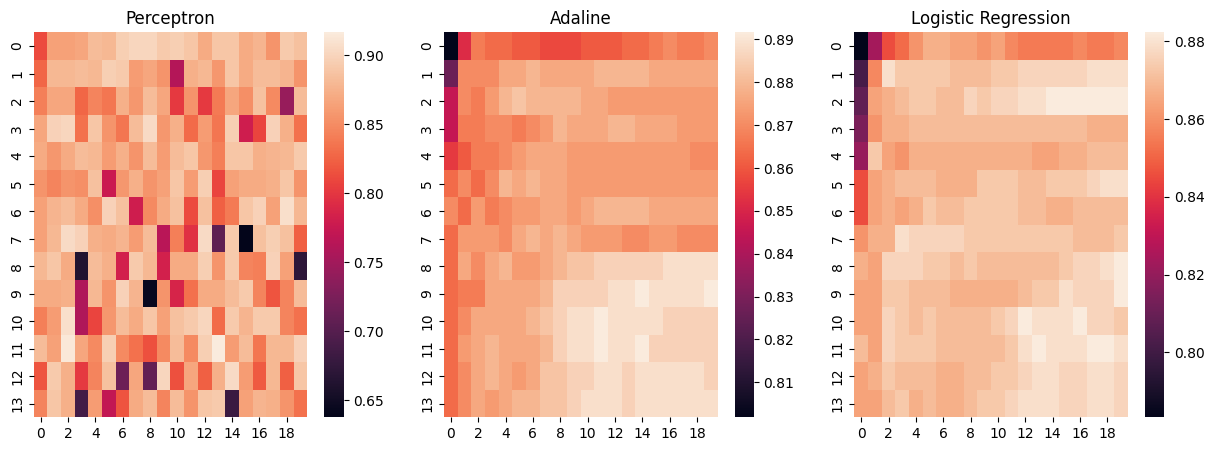

In [24]:
# Insert your code below
# ======================
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

titles = ['Perceptron', 'Adaline', 'Logistic Regression']

for data in range(3):    

    sns.heatmap(results[data, :, :], ax=ax[data])
    ax[data].set_title(titles[data])    
    

# Part V: Some more plotting

For the following cell to execute you need to have the variable `X_test_scaled` with all samples of the test set and the variable `y_test` with the corresponding labels.
Complete at least up until Part III. Executing the cell will plot something.

1. Add code comments explaining what the lines are doing
2. What is the purpose of the plot?
3. Describe all components of the subplot and then comment in general on the entire plot. What does it show? What does it not show?

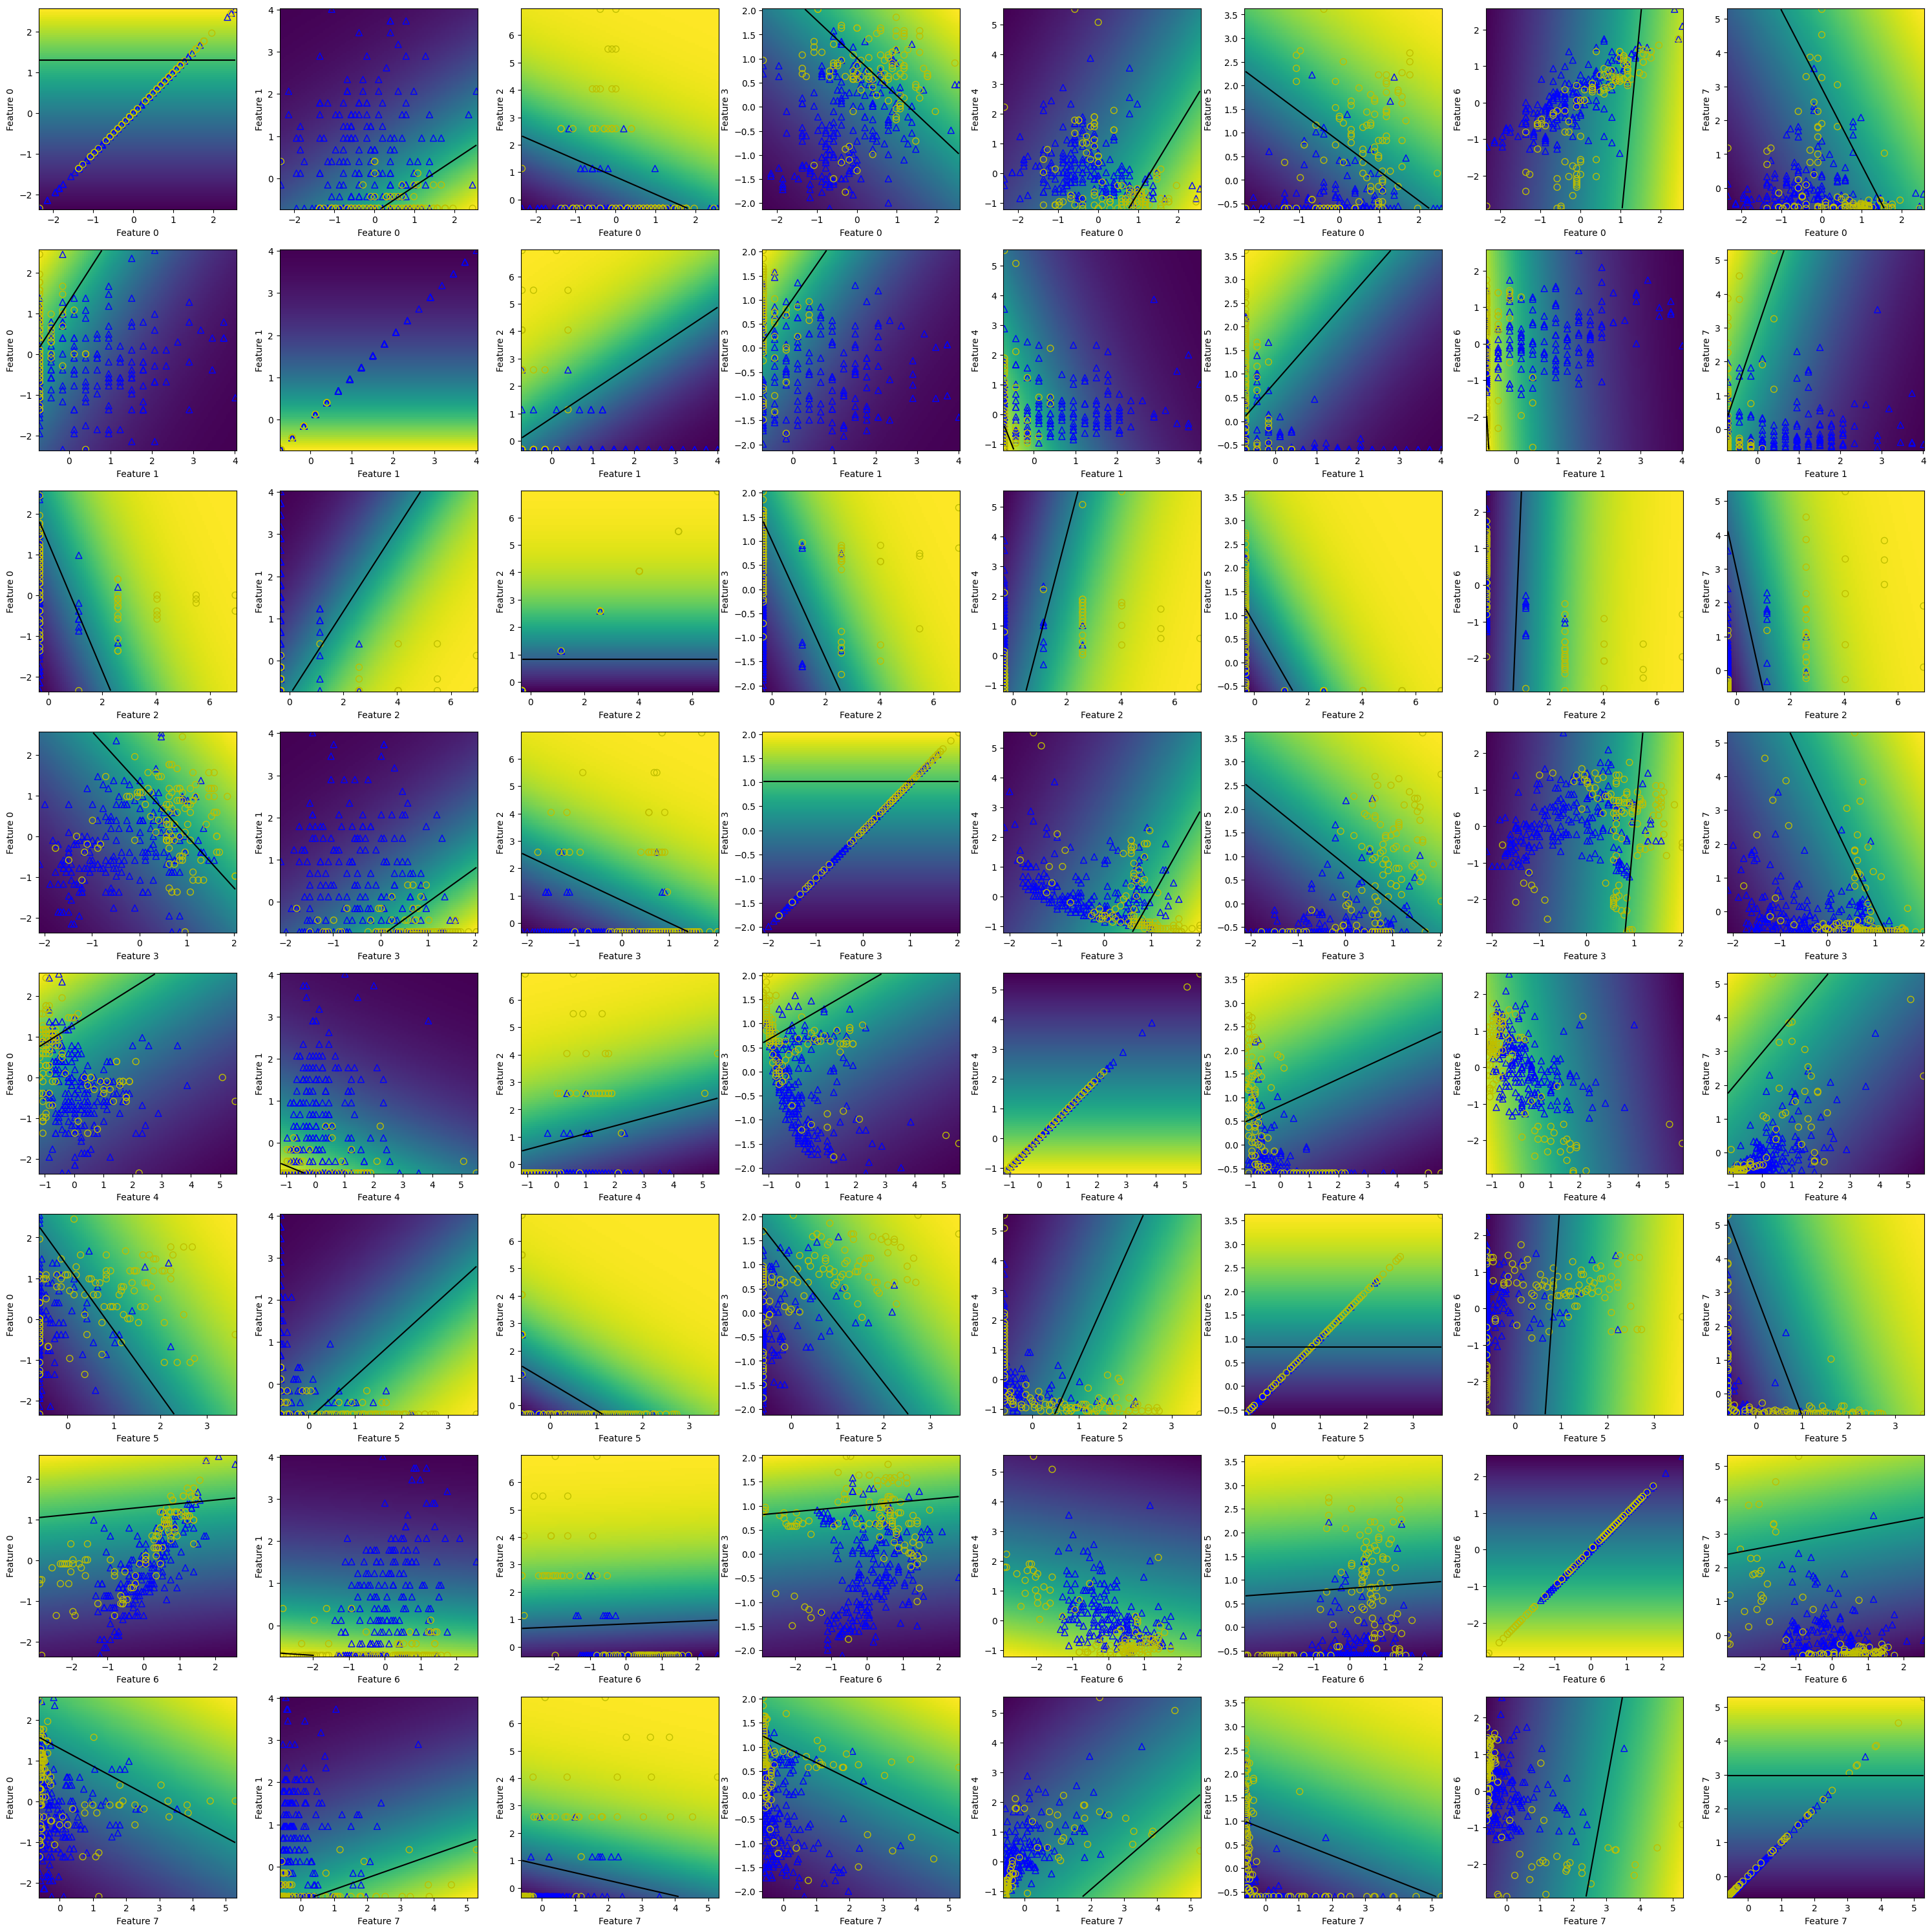

In [22]:
# Since (as far as I understand) the existing X_test-set is already scaled (I assume this means normalised / standardised?) I leave it with
# assigning the existing test set to the X_test_scaled variable name:

X_test_scaled = X_test

# Train and a logistic regression model with 300 epochs and learning rate 0.0001
clf = LogisticRegression(eta = 0.0001, epochs = 300, minibatches=1, random_seed=42)
clf.fit(X_test_scaled, y_test)

# The following is very similar to what I did (for the first time ever) in my visualisation of the raw data at the very top, only that this collection of subplots doesn't account for
# that pairs of identical features create useless 100% linear plots (which I spent way too much time to avoid). Therefore, all subplots with ax[i, j==i]
# just depict the same feature compared to itself. Other than that, I created sns scatter plots with colour-differenciating (hue='fetal_health' (y)), as 
# opposed to the shape/colour differentiating here. Furthermore, the plots below involve contour plots and the decision boundary created by the 
# linear regression model clf. 

fig, axes = plt.subplots(8, 8, figsize=(30, 30))
for i in range(0, 8):
    for j in range(0, 8):
        feature_1 = i
        feature_2 = j
        ax = axes[i, j]

        ax.set_xlabel(f"Feature {feature_1}")
        ax.set_ylabel(f"Feature {feature_2}")

        # I guess this is just for creating an even scale from minimum to maximum for every feature array to use for axes in the plots:
        mins = X_test_scaled.min(axis=0)
        maxs = X_test_scaled.max(axis=0)

        x0 = np.linspace(mins[feature_1], maxs[feature_1], 100)
        x1 = np.linspace(mins[feature_2], maxs[feature_2], 100)

        # I can't recall having seen this before, but ChatGPT tells me (come on, it must be allowed to ask ChatGPT for explanations on totally new code)
        # that this convertion is used to create unique pairs of x0- and x1-values for
        # plotting. An explanation in the comment section, in class or in a lecture would be welcome!
        X0, X1 = np.meshgrid(x0, x1)
        X_two_features = np.c_[X0.ravel(), X1.ravel()]
        X_plot = np.zeros(shape=(X_two_features.shape[0], X_test_scaled.shape[1]))

        X_plot[:, feature_1] = X_two_features[:, 0]
        X_plot[:, feature_2] = X_two_features[:, 1]

        # So this part must create the decision boundary from the logistic regression model:
        y_pred = clf.predict_proba(X_plot)
        Z = y_pred.reshape(X0.shape)

        # And the two upper lines here plot the contour and the decision boundary. The two lower lines plot the scatter plot of the different 
        # pairs of x0 and x1 values with shapes (marker=) and colors (blue/yellow) corresponding to their class labels (y_test == 0/1):
        ax.pcolor(X0, X1, Z)
        ax.contour(X0, X1, Z, levels=[0.5], colors='k')
        ax.scatter(X_test_scaled[y_test == 0, feature_1], X_test_scaled[y_test == 0, feature_2], color="b", marker="^", s=50, facecolors="none")
        ax.scatter(X_test_scaled[y_test == 1, feature_1], X_test_scaled[y_test == 1, feature_2], color="y", marker="o", s=50, facecolors="none")

fig.tight_layout()
plt.show()

## Part VI: Additional discussion

### Part I:
1. For visualisation of scaling needs, I made a violin plot. As this can visualise both mean, standard deviation and value distribution of more than one feature next to each other, this provides a good visual on the proportionality between feature value sizes. After the first violin plot, it was pretty clear that the feature values needed to be scaled / normalized to be comparable.
2. Similarly to the plots above, I also used scatter plots to visualise linear separability between pairs of features in the raw data. However, I used seaborn with the parameter hue='fetal_health', which is the target label (this gives the plot points different colours accordingly). I did not use the "marker"-parameter, as I didn't know of it yet. I used scatter plots with color marking of the binary class label here, because it gives a good visual on separability.

### Part II:
1. What happens if we don't shuffle the training data before training the classifiers like in Part IV?
   
Before the training set was shuffled, it was sorted by class labels (0s first and then 1s at the bottom). In part IV, we use different sample sizes from the training set (range(50, 701, 50)) - if the training set weren't sorted, we would have ended up with only 0s in the first training samples and then a bigger and bigger share of 1s as we increased the sample size past the amount of 0s. Because we shuffled the data, we will have random distributions of 0s and 1s in all sample sizes.

One question I have is how much it would matter that the suffling is random and not takes an equal distribution of 0s and 1s into account. If there are (in a more or less likely case) 85% 0s in the sample of size 50 and suddenly 80% 1s in the sample of size 250, would that make a difference? Is it not important to keep the share at 70:30 for all sample sizes?

2. How could you do the same train/test split (Point 1.-4.) using scikit-learn?

scikit-learn has the procedure `train_test_split(x='--set of features--', y='--set of target labels--', test_size='--share of test set (float)--', ...)`, which makes this process much more compressed. There are a few other parametres too (e.g. `random_state=`, `stratify=`), but I'm not entirely sure of what these do.

### Part IV:
1. (and 2) How does increasing the dataset size affect the performance of the logistic regression model? Provide a summary of your findings.

The performance of the `clf` seems to have a rather proportional coherence between the number of epochs and the size of the sample. A small dataset leads to as low a probability for a good performance as a small number of epochs. The larger the dataset, and the larger the number of epochs, the higher probability of a good performance. The highest concentration of good performance (of about 89%), however, seems to lie in the area of (9, 9-11) and (15, 9-11) in the adaline heat map - which translates to 42-72 epochs and 450-550 rows - and (12, 10-11) and (16, 10-11) for logistic regression, which translates to 57-77 epochs and 500-550 rows. There are some combinations on lower levels that score very high, particularly for the logistic regression, but their distribution seems rather unpredictable compared to the high occurence of good performance in the bottom right corner of the heat maps (Part IV; Performance Visualisation).
   
3. Which classifier is much slower to train and why do you think that is?

I didn't get this demonstrated, as I trained all the classification models in the same loop (sorry), so I couldn't observe this in the process. However, I now know that the perceptron is the slowest to train, as it updates its weights after every iteration through the dataset as opposed to after every epoch (batch-wise), as the other models do. This takes much longer and is not (necessarily?) beneficial.

4. One classifier shows strong fluctuations in accuracy for different dataset sizes and number of epochs. Which one is it and why do you think this happens?

The perceptron shows highly varying results despite high numbers of epochs and / or large sample sizes. This may be due to the binary threshold function (only updating weights due to misclassification of every individual net input) as only "control instance" for both updating weights and end classification.